In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

df1 = pd.read_csv(
    'datasets/control/dataset_2024-05-17_21-00_50x_48C_6-conc.csv')
df1['group'] = 'control'
df1['source'] = 'PNode1'

df2 = pd.read_csv(
    'datasets/control/dataset_2024-05-18_21-00_50x_44C_6-conc.csv')
df2['group'] = 'control'
df2['source'] = 'PNode2'

df3 = pd.read_csv(
    'datasets/experimental/dataset_2024-05-19_21-00_50x_48C_6-conc.csv')
df3['group'] = 'experimental'
df3['source'] = 'PNode1'

df4 = pd.read_csv(
    'datasets/experimental/dataset_2024-05-20_21-00_50x_44C_6-conc.csv')
df4['group'] = 'experimental'
df4['source'] = 'PNode2'


df = pd.concat([df1, df2, df3, df4])
df.reset_index(drop=True, inplace=True)

for column in df.filter(like='_avg_watts_consumption').columns:
    prefix = column.split('_avg_watts_consumption')[0]

    duration = df[f'pipeline_duration']
    watts = df[column]

    duration = duration if prefix == 'cicd_server' else duration+1.385
    df[f'{prefix}_joules_consumption'] = watts * duration

df

,project_id,pipeline_id,pipeline_start,pipeline_finish,pipeline_duration,cicd_server_avg_watts_consumption,monitoring_pc_avg_watts_consumption,group,source,cicd_server_joules_consumption,monitoring_pc_joules_consumption
0,21,1850,1715972412,1715972802,390,58.407068,14.490311,control,PNode1,22778.756620,5671.290461
1,21,1851,1715973439,1715973865,426,51.022359,14.414289,control,PNode1,21735.525066,6160.451014
2,21,1852,1715974525,1715974906,381,51.422157,14.701992,control,PNode1,19591.841827,5621.821100
3,21,1853,1715975551,1715975927,376,52.517628,14.627342,control,PNode1,19746.627982,5520.139450
4,21,1854,1715976577,1715976970,393,50.339940,14.966652,control,PNode1,19783.596430,5902.623059
...,...,...,...,...,...,...,...,...,...,...,...
195,8,2802,1716256955,1716257484,529,69.608703,14.358698,experimental,PNode2,36823.003857,7615.638119
196,8,2803,1716257502,1716258036,534,68.657908,14.751601,experimental,PNode2,36663.323001,7897.786093
197,8,2804,1716258049,1716258577,528,69.456789,14.772292,experimental,PNode2,36673.184751,7820.229840
198,8,2805,1716258596,1716259121,525,69.268529,14.755422,experimental,PNode2,36365.977563,7767.032680


In [2]:
import seaborn as sns
from matplotlib.ticker import FuncFormatter

colors = sns.color_palette("deep")


def format_joules(x, pos):
    if x >= 1000000:
        return '{:.0f} MJ'.format(x / 1000000)
    elif x >= 1000:
        return '{:.0f} kJ'.format(x / 1000)
    else:
        return '{:.0f} J'.format(x)

Split dataset into 2 sources

In [3]:
node1 = df[df['source'] == 'PNode1']
node2 = df[df['source'] == 'PNode2']

Boxplot for PNode1-PNode3-pair with outliers

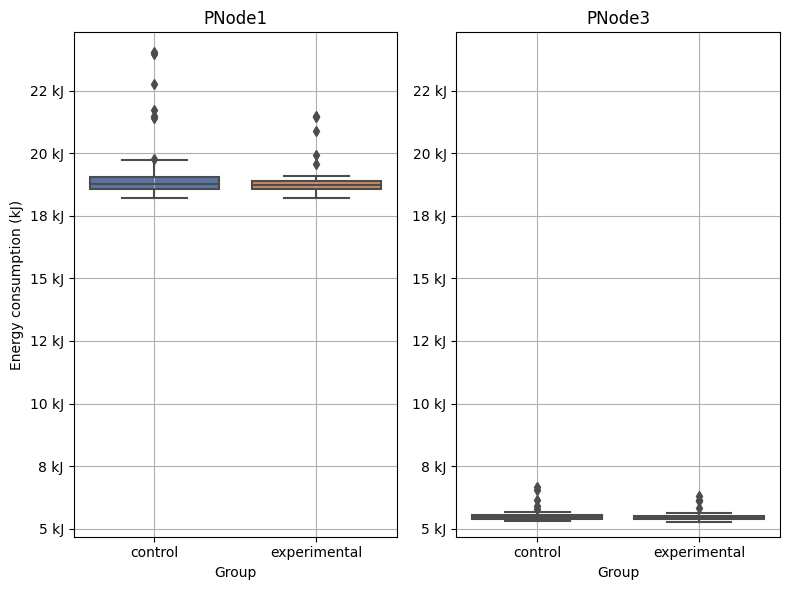

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='group', y='cicd_server_joules_consumption',
            data=node1, linewidth=1.5, palette='deep')

plt.title('PNode1')
plt.xlabel('Group')
plt.ylabel('Energy consumption (kJ)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_joules))
y_limits1 = plt.gca().get_ylim()

plt.subplot(1, 2, 2)
sns.boxplot(x='group', y='monitoring_pc_joules_consumption',
            data=node1, linewidth=1.5, palette='deep')

plt.title('PNode3')
plt.xlabel('Group')
plt.ylabel('')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_joules))
y_limits2 = plt.gca().get_ylim()

combined_y_limits = (
    min(y_limits1[0], y_limits2[0])-500, max(y_limits1[1], y_limits2[1])+500)

plt.subplot(1, 2, 1)
plt.ylim(combined_y_limits)

plt.subplot(1, 2, 2)
plt.ylim(combined_y_limits)

plt.tight_layout()
plt.savefig('pnode-1-3-boxplot-with-outliers.pdf', dpi=300)
plt.show()

Boxplot for PNode2-PNode3-pair with outliers

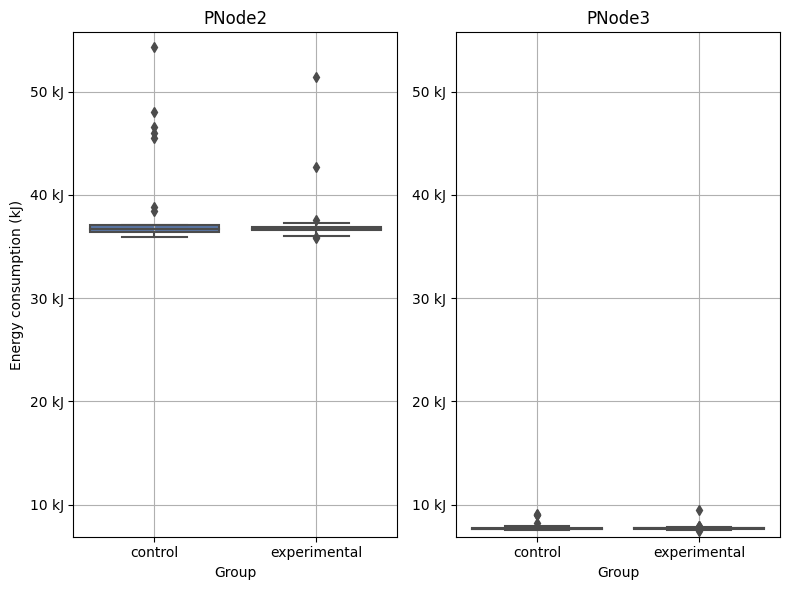

In [5]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='group', y='cicd_server_joules_consumption',
            data=node2, linewidth=1.5, palette='deep')

plt.title('PNode2')
plt.xlabel('Group')
plt.ylabel('Energy consumption (kJ)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_joules))
y_limits1 = plt.gca().get_ylim()

plt.subplot(1, 2, 2)
sns.boxplot(x='group', y='monitoring_pc_joules_consumption',
            data=node2, linewidth=1.5, palette='deep')

plt.title('PNode3')
plt.xlabel('Group')
plt.ylabel('')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_joules))
y_limits2 = plt.gca().get_ylim()

combined_y_limits = (
    min(y_limits1[0], y_limits2[0])-500, max(y_limits1[1], y_limits2[1])+500)

plt.subplot(1, 2, 1)
plt.ylim(combined_y_limits)

plt.subplot(1, 2, 2)
plt.ylim(combined_y_limits)

plt.tight_layout()
plt.savefig('pnode-2-3-boxplot-with-outliers.pdf', dpi=300)
plt.show()

Normality test for PNode1-PNode3-pair with outliers

In [6]:
from scipy.stats import shapiro

pc1_outliers_normal = []
pc1_outliers_non_normal = []

for group in ['control', 'experimental']:
    print("Group:", group)
    stat, p = shapiro(node1[node1['group'] == group]
                      ['cicd_server_joules_consumption'])
    alpha = 0.05
    if p > alpha:
        print(f"CI/CD Server, Normal,", f"Stat={stat}, p-value={p}")
        pc1_outliers_normal.append((group, 'ci/cd'))
    else:
        print(f"CI/CD Server, Non-normal,", f"Stat={stat}, p-value={p}")
        pc1_outliers_non_normal.append((group, 'ci/cd'))

    stat, p = shapiro(node1[node1['group'] == group]
                      ['monitoring_pc_joules_consumption'])
    alpha = 0.05
    if p > alpha:
        print(f"Monitoring PC, Normal,", f"Stat={stat}, p-value={p}")
        pc1_outliers_normal.append((group, 'monitoring'))
    else:
        print(f"Monitoring PC, Non-normal,", f"Stat={stat}, p-value={p}")
        pc1_outliers_non_normal.append((group, 'monitoring'))
    print()

Group: control
CI/CD Server, Non-normal, Stat=0.6141039133071899, p-value=3.1724869953286827e-10
Monitoring PC, Non-normal, Stat=0.6405274868011475, p-value=8.180454647011004e-10

Group: experimental
CI/CD Server, Non-normal, Stat=0.631106972694397, p-value=5.805906311273645e-10
Monitoring PC, Non-normal, Stat=0.7469298243522644, p-value=6.394166263135048e-08



Normality test for PNode2-PNode3-pair with outliers

In [7]:
pc2_outliers_normal = []
pc2_outliers_non_normal = []

for group in ['control', 'experimental']:
    print("Group:", group)
    stat, p = shapiro(node2[node2['group'] == group]
                      ['cicd_server_joules_consumption'])
    alpha = 0.05
    if p > alpha:
        print(f"CI/CD Server, Normal,", f"Stat={stat}, p-value={p}")
        pc2_outliers_normal.append((group, 'ci/cd'))
    else:
        print(f"CI/CD Server, Non-normal,", f"Stat={stat}, p-value={p}")
        pc2_outliers_non_normal.append((group, 'ci/cd'))

    stat, p = shapiro(node2[node2['group'] == group]
                      ['monitoring_pc_joules_consumption'])
    alpha = 0.05
    if p > alpha:
        print(f"Monitoring PC, Normal,", f"Stat={stat}, p-value={p}")
        pc2_outliers_normal.append((group, 'monitoring'))
    else:
        print(f"Monitoring PC, Non-normal,", f"Stat={stat}, p-value={p}")
        pc2_outliers_non_normal.append((group, 'monitoring'))
    print()

Group: control
CI/CD Server, Non-normal, Stat=0.46905577182769775, p-value=3.3924904985910276e-12
Monitoring PC, Non-normal, Stat=0.5593641996383667, p-value=5.081427986719511e-11

Group: experimental
CI/CD Server, Non-normal, Stat=0.3084602952003479, p-value=5.609707441405973e-14
Monitoring PC, Non-normal, Stat=0.375049889087677, p-value=2.802466104231266e-13



Data for PNode1-PNode3-pair with outliers

In [8]:
print("Control; CI/CD; Std",
      node1[node1['group'] == 'control']['cicd_server_joules_consumption'].std())
print("Control; Monitoring; Std",
      node1[node1['group'] == 'control']['monitoring_pc_joules_consumption'].std())
print()
print("Control; CI/CD; Central Tendency", node1[node1['group'] == 'control']['cicd_server_joules_consumption'].mean() if (
    'control', 'ci/cd') in pc1_outliers_normal else node1[node1['group'] == 'control']['cicd_server_joules_consumption'].median())
print("Control; Monitoring; Central Tendency", node1[node1['group'] == 'control']['monitoring_pc_joules_consumption'].mean() if (
    'control', 'monitoring') in pc1_outliers_normal else node1[node1['group'] == 'control']['monitoring_pc_joules_consumption'].median())
print()
print("Experimental; CI/CD; Std",
      node1[node1['group'] == 'experimental']['cicd_server_joules_consumption'].std())
print("Experimental; Monitoring; Std",
      node1[node1['group'] == 'experimental']['monitoring_pc_joules_consumption'].std())
print()
print("Experimental; CI/CD; Central Tendency", node1[node1['group'] == 'experimental']['cicd_server_joules_consumption'].mean() if (
    'experimental', 'ci/cd') in pc1_outliers_normal else node1[node1['group'] == 'experimental']['cicd_server_joules_consumption'].median())
print("Experimental; Monitoring; Central Tendency", node1[node1['group'] == 'experimental']['monitoring_pc_joules_consumption'].mean() if (
    'experimental', 'monitoring') in pc1_outliers_normal else node1[node1['group'] == 'experimental']['monitoring_pc_joules_consumption'].median())

Control; CI/CD; Std 1343.8590544168894
Control; Monitoring; Std 267.80201709461943

Control; CI/CD; Central Tendency 18771.53408791667
Control; Monitoring; Central Tendency 5469.438568890376

Experimental; CI/CD; Std 680.5260791156087
Experimental; Monitoring; Std 211.03567944890776

Experimental; CI/CD; Central Tendency 18750.407212702703
Experimental; Monitoring; Central Tendency 5433.396081629662


Data for PNode2-PNode3-pair with outliers

In [9]:
print("Control; CI/CD; Std",
      node2[node2['group'] == 'control']['cicd_server_joules_consumption'].std())
print("Control; Monitoring; Std",
      node2[node2['group'] == 'control']['monitoring_pc_joules_consumption'].std())
print()
print("Control; CI/CD; Central Tendency", node2[node2['group'] == 'control']['cicd_server_joules_consumption'].mean() if (
    'control', 'ci/cd') in pc2_outliers_normal else node2[node2['group'] == 'control']['cicd_server_joules_consumption'].median())
print("Control; Monitoring; Central Tendency", node2[node2['group'] == 'control']['monitoring_pc_joules_consumption'].mean() if (
    'control', 'monitoring') in pc2_outliers_normal else node2[node2['group'] == 'control']['monitoring_pc_joules_consumption'].median())
print()
print("Experimental; CI/CD; Std",
      node2[node2['group'] == 'experimental']['cicd_server_joules_consumption'].std())
print("Experimental; Monitoring; Std",
      node2[node2['group'] == 'experimental']['monitoring_pc_joules_consumption'].std())
print()
print("Experimental; CI/CD; Central Tendency", node2[node2['group'] == 'experimental']['cicd_server_joules_consumption'].mean() if (
    'experimental', 'ci/cd') in pc2_outliers_normal else node2[node2['group'] == 'experimental']['cicd_server_joules_consumption'].median())
print("Experimental; Monitoring; Central Tendency", node2[node2['group'] == 'experimental']['monitoring_pc_joules_consumption'].mean() if (
    'experimental', 'monitoring') in pc2_outliers_normal else node2[node2['group'] == 'experimental']['monitoring_pc_joules_consumption'].median())

Control; CI/CD; Std 3646.1986340918834
Control; Monitoring; Std 343.4922582108172

Control; CI/CD; Central Tendency 36656.169226169826
Control; Monitoring; Central Tendency 7670.391425897037

Experimental; CI/CD; Std 2260.829288731635
Experimental; Monitoring; Std 261.6314079284055

Experimental; CI/CD; Central Tendency 36692.9185413246
Experimental; Monitoring; Central Tendency 7695.8790086271765


PNode1 histogram control & experimental with outliers

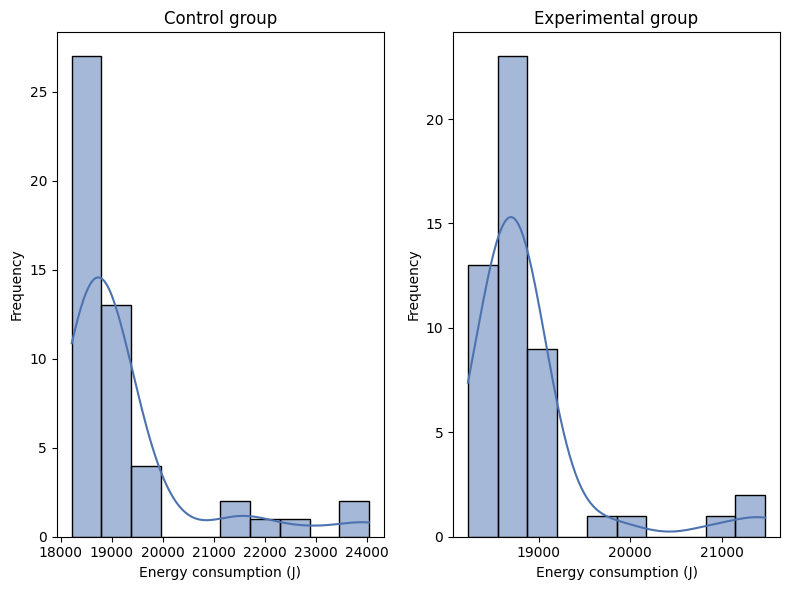

In [10]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.histplot(node1[node1['group'] == 'control']
             ['cicd_server_joules_consumption'], color=colors[0], kde=True, bins=10)
plt.xlabel('Energy consumption (J)')
plt.ylabel('Frequency')
plt.title('Control group')

plt.subplot(1, 2, 2)
sns.histplot(node1[node1['group'] == 'experimental']
             ['cicd_server_joules_consumption'], color=colors[0], kde=True, bins=10)
plt.xlabel('Energy consumption (J)')
plt.ylabel('Frequency')
plt.title('Experimental group')

plt.tight_layout()
plt.savefig(f'pnode-1-hist-with-outliers.pdf', dpi=300)
plt.show()

PNode2 histogram control & experimental with outliers

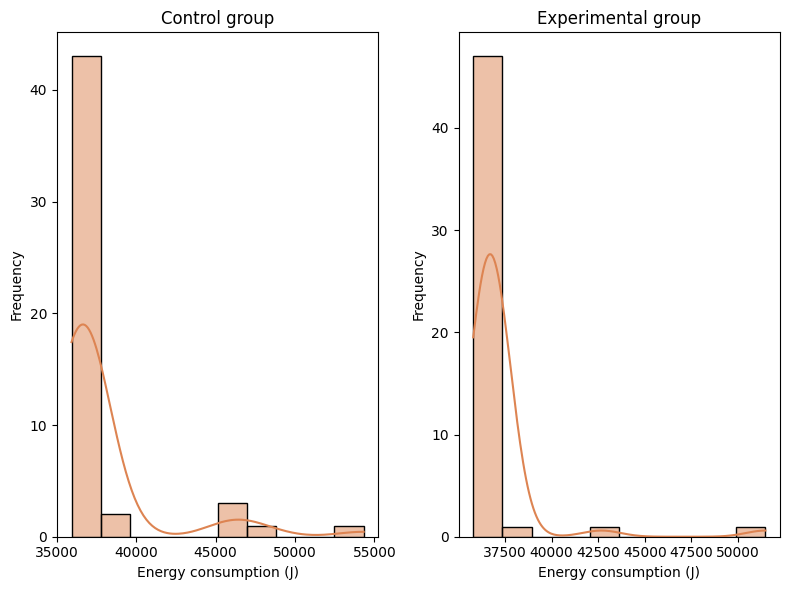

In [11]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.histplot(node2[node2['group'] == 'control']
             ['cicd_server_joules_consumption'], color=colors[1], kde=True, bins=10)
plt.xlabel('Energy consumption (J)')
plt.ylabel('Frequency')
plt.title('Control group')

plt.subplot(1, 2, 2)
sns.histplot(node2[node2['group'] == 'experimental']
             ['cicd_server_joules_consumption'], color=colors[1], kde=True, bins=10)
plt.xlabel('Energy consumption (J)')
plt.ylabel('Frequency')
plt.title('Experimental group')

plt.tight_layout()
plt.savefig(f'pnode-2-hist-with-outliers.pdf', dpi=300)
plt.show()

IQR

In [12]:
from matplotlib.cbook import boxplot_stats


def get_iqr_range(df, group):
    stats = boxplot_stats(df[df['group'] == group]
                          ['cicd_server_joules_consumption'])

    Q1 = stats[0]['q1']
    Q3 = stats[0]['q3']

    IQR = Q3 - Q1
    max = Q3 + 1.5 * IQR
    min = Q1 - 1.5 * IQR

    return min, max

PNode1 remove outliers

In [13]:
pc1_c = get_iqr_range(node1, 'control')
pc1_e = get_iqr_range(node1, 'experimental')

pc1_no_outliers_c = node1[node1['group'] == 'control'][(
    node1['cicd_server_joules_consumption'] >= pc1_c[0]) & (node1['cicd_server_joules_consumption'] <= pc1_c[1])]
print("Removed from control:", 50-len(pc1_no_outliers_c))

pc1_no_outliers_e = node1[node1['group'] == 'experimental'][(
    node1['cicd_server_joules_consumption'] >= pc1_e[0]) & (node1['cicd_server_joules_consumption'] <= pc1_e[1])]
print("Removed from experimental:", 50-len(pc1_no_outliers_e))

pc1_no_outliers = pd.concat([pc1_no_outliers_c, pc1_no_outliers_e])

Removed from control: 7
Removed from experimental: 5


/var/folders/tc/_vy_hkrd0437j7j655yvr_z40000gn/T/ipykernel_62416/2978073676.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pc1_no_outliers_c = node1[node1['group'] == 'control'][(
/var/folders/tc/_vy_hkrd0437j7j655yvr_z40000gn/T/ipykernel_62416/2978073676.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pc1_no_outliers_e = node1[node1['group'] == 'experimental'][(


PNode2 remove outliers

In [14]:
pc2_c = get_iqr_range(node2, 'control')
pc2_e = get_iqr_range(node2, 'experimental')

pc2_no_outliers_c = node2[node2['group'] == 'control'][(
    node2['cicd_server_joules_consumption'] >= pc2_c[0]) & (node2['cicd_server_joules_consumption'] <= pc2_c[1])]
print("Removed from control:", 50-len(pc2_no_outliers_c))

pc2_no_outliers_e = node2[node2['group'] == 'experimental'][(
    node2['cicd_server_joules_consumption'] >= pc2_e[0]) & (node2['cicd_server_joules_consumption'] <= pc2_e[1])]
print("Removed from experimental:", 50-len(pc2_no_outliers_e))

pc2_no_outliers = pd.concat([pc2_no_outliers_c, pc2_no_outliers_e])

Removed from control: 7
Removed from experimental: 5


/var/folders/tc/_vy_hkrd0437j7j655yvr_z40000gn/T/ipykernel_62416/3359462934.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pc2_no_outliers_c = node2[node2['group'] == 'control'][(
/var/folders/tc/_vy_hkrd0437j7j655yvr_z40000gn/T/ipykernel_62416/3359462934.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pc2_no_outliers_e = node2[node2['group'] == 'experimental'][(


PNode1 histogram control & experimental without outliers

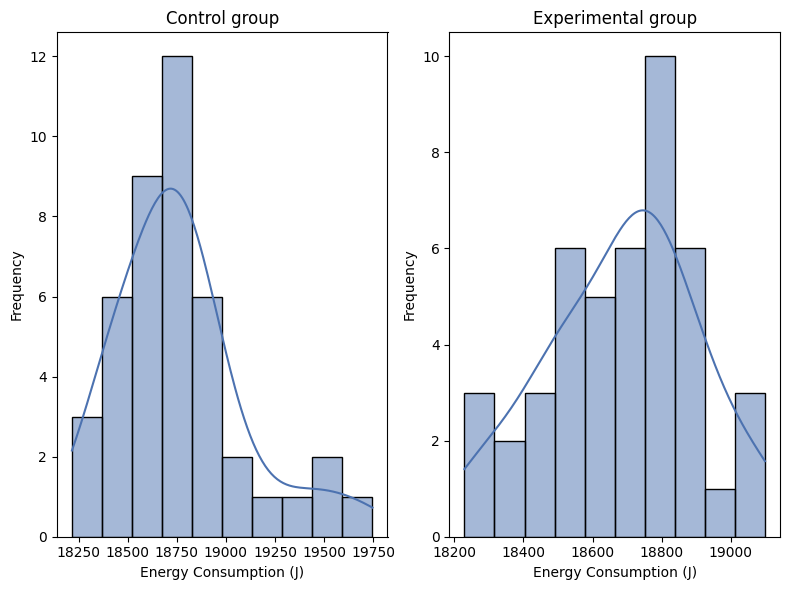

In [15]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.histplot(pc1_no_outliers_c['cicd_server_joules_consumption'],
             color=colors[0], kde=True, bins=10)
plt.xlabel('Energy Consumption (J)')
plt.ylabel('Frequency')
plt.title('Control group')

plt.subplot(1, 2, 2)
sns.histplot(pc1_no_outliers_e['cicd_server_joules_consumption'],
             color=colors[0], kde=True, bins=10)
plt.xlabel('Energy Consumption (J)')
plt.ylabel('Frequency')
plt.title('Experimental group')

plt.tight_layout()
plt.savefig(f'pnode-1-hist-without-outliers.pdf', dpi=300)
plt.show()

PNode2 histogram control & experimental without outliers

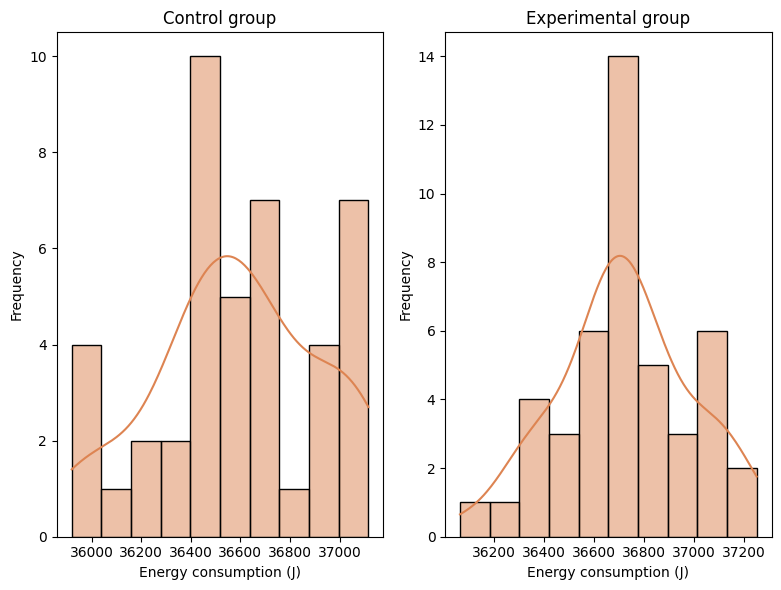

In [16]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.histplot(pc2_no_outliers_c['cicd_server_joules_consumption'],
             color=colors[1], kde=True, bins=10)
plt.xlabel('Energy consumption (J)')
plt.ylabel('Frequency')
plt.title('Control group')

plt.subplot(1, 2, 2)
sns.histplot(pc2_no_outliers_e['cicd_server_joules_consumption'],
             color=colors[1], kde=True, bins=10)
plt.xlabel('Energy consumption (J)')
plt.ylabel('Frequency')
plt.title('Experimental group')

plt.tight_layout()
plt.savefig(f'pnode-2-hist-without-outliers.pdf', dpi=300)
plt.show()

Boxplot for PNode1-PNode3-pair without outliers

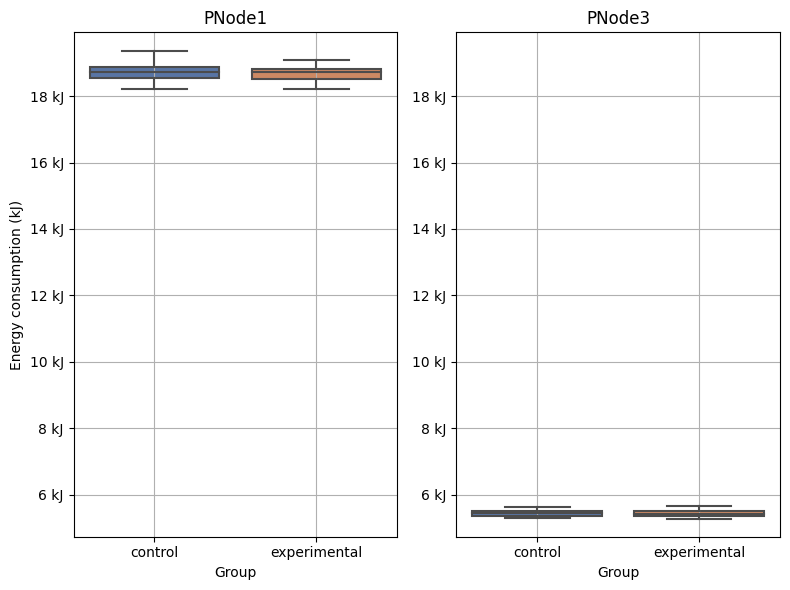

In [17]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='group', y='cicd_server_joules_consumption',
            data=pc1_no_outliers, linewidth=1.5, palette='deep', showfliers=False)

plt.title('PNode1')
plt.xlabel('Group')
plt.ylabel('Energy consumption (kJ)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_joules))
y_limits1 = plt.gca().get_ylim()

plt.subplot(1, 2, 2)
sns.boxplot(x='group', y='monitoring_pc_joules_consumption',
            data=pc1_no_outliers, linewidth=1.5, palette='deep', showfliers=False)

plt.title('PNode3')
plt.xlabel('Group')
plt.ylabel('')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_joules))
y_limits2 = plt.gca().get_ylim()

combined_y_limits = (
    min(y_limits1[0], y_limits2[0])-500, max(y_limits1[1], y_limits2[1])+500)

plt.subplot(1, 2, 1)
plt.ylim(combined_y_limits)

plt.subplot(1, 2, 2)
plt.ylim(combined_y_limits)

plt.tight_layout()
plt.savefig('pnode-1-3-boxplot-without-outliers.pdf', dpi=300)
plt.show()

Boxplot for PNode2-PNode3-pair without outliers

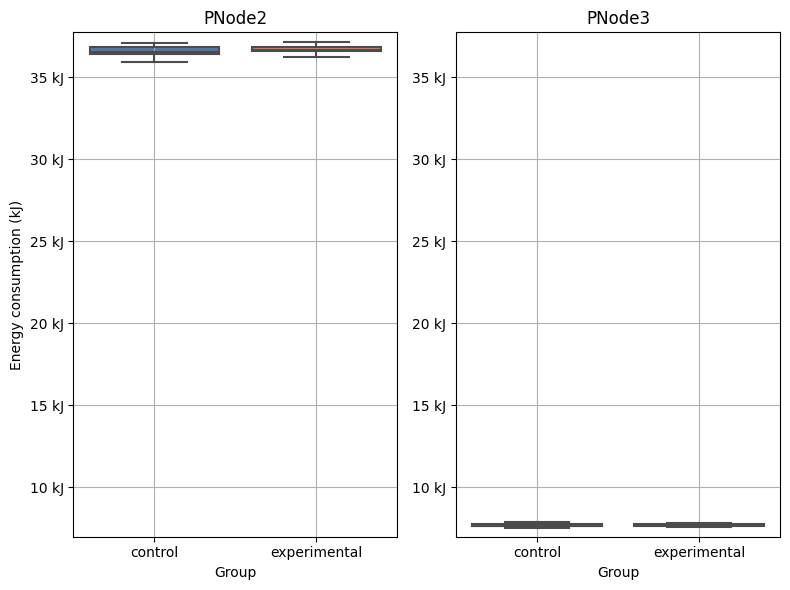

In [18]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='group', y='cicd_server_joules_consumption',
            data=pc2_no_outliers, linewidth=1.5, palette='deep', showfliers=False)

plt.title('PNode2')
plt.xlabel('Group')
plt.ylabel('Energy consumption (kJ)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_joules))
y_limits1 = plt.gca().get_ylim()

plt.subplot(1, 2, 2)
sns.boxplot(x='group', y='monitoring_pc_joules_consumption',
            data=pc2_no_outliers, linewidth=1.5, palette='deep', showfliers=False)

plt.title('PNode3')
plt.xlabel('Group')
plt.ylabel('')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_joules))
y_limits2 = plt.gca().get_ylim()

combined_y_limits = (
    min(y_limits1[0], y_limits2[0])-500, max(y_limits1[1], y_limits2[1])+500)

plt.subplot(1, 2, 1)
plt.ylim(combined_y_limits)

plt.subplot(1, 2, 2)
plt.ylim(combined_y_limits)

plt.tight_layout()
plt.savefig('pnode-2-3-boxplot-without-outliers.pdf', dpi=300)
plt.show()

Normality test for PNode1-PNode3-pair without outliers

In [19]:
pc1_normal = []
pc1_non_normal = []

for group in ['control', 'experimental']:
    print("Group:", group)
    stat, p = shapiro(pc1_no_outliers[pc1_no_outliers['group'] == group]
                      ['cicd_server_joules_consumption'])
    alpha = 0.05
    if p > alpha:
        print(f"CI/CD Server, Normal,", f"Stat={stat}, p-value={p}")
        pc1_normal.append((group, 'ci/cd'))
    else:
        print(f"CI/CD Server, Non-normal,", f"Stat={stat}, p-value={p}")
        pc1_non_normal.append((group, 'ci/cd'))

    stat, p = shapiro(pc1_no_outliers[pc1_no_outliers['group'] == group]
                      ['monitoring_pc_joules_consumption'])
    alpha = 0.05
    if p > alpha:
        print(f"Monitoring PC, Normal,", f"Stat={stat}, p-value={p}")
        pc1_normal.append((group, 'monitoring'))
    else:
        print(f"Monitoring PC, Non-normal,", f"Stat={stat}, p-value={p}")
        pc1_non_normal.append((group, 'monitoring'))
    print()

Group: control
CI/CD Server, Non-normal, Stat=0.9242858290672302, p-value=0.007444213610142469
Monitoring PC, Normal, Stat=0.9505439400672913, p-value=0.06239931285381317

Group: experimental
CI/CD Server, Normal, Stat=0.979783296585083, p-value=0.61098712682724
Monitoring PC, Normal, Stat=0.966360867023468, p-value=0.21265649795532227



Normality test for PNode2-PNode3-pair without outliers

In [20]:
pc2_normal = []
pc2_non_normal = []

for group in ['control', 'experimental']:
    print("Group:", group)
    stat, p = shapiro(pc2_no_outliers[pc2_no_outliers['group'] == group]
                      ['cicd_server_joules_consumption'])
    alpha = 0.05
    if p > alpha:
        print(f"CI/CD Server, Normal,", f"Stat={stat}, p-value={p}")
        pc2_normal.append((group, 'ci/cd'))
    else:
        print(f"CI/CD Server, Non-normal,", f"Stat={stat}, p-value={p}")
        pc2_non_normal.append((group, 'ci/cd'))

    stat, p = shapiro(pc2_no_outliers[pc2_no_outliers['group'] == group]
                      ['monitoring_pc_joules_consumption'])
    alpha = 0.05
    if p > alpha:
        print(f"Monitoring PC, Normal,", f"Stat={stat}, p-value={p}")
        pc2_normal.append((group, 'monitoring'))
    else:
        print(f"Monitoring PC, Non-normal,", f"Stat={stat}, p-value={p}")
        pc2_non_normal.append((group, 'monitoring'))
    print()

Group: control
CI/CD Server, Normal, Stat=0.9591231346130371, p-value=0.12876318395137787
Monitoring PC, Normal, Stat=0.9554973840713501, p-value=0.09478079527616501

Group: experimental
CI/CD Server, Normal, Stat=0.9796956181526184, p-value=0.607467532157898
Monitoring PC, Normal, Stat=0.9847201108932495, p-value=0.8092824816703796



Data for PNode1-PNode3-pair without outliers

In [21]:
print("Control; CI/CD; Std",
      pc1_no_outliers_c['cicd_server_joules_consumption'].std())
print("Control; Monitoring; Std",
      pc1_no_outliers_c['monitoring_pc_joules_consumption'].std())
print()
print("Control; CI/CD; Central Tendency", pc1_no_outliers_c['cicd_server_joules_consumption'].mean() if (
    'control', 'ci/cd') in pc1_normal else pc1_no_outliers_c['cicd_server_joules_consumption'].median())
print("Control; Monitoring; Central Tendency", pc1_no_outliers_c['monitoring_pc_joules_consumption'].mean() if (
    'control', 'monitoring') in pc1_normal else pc1_no_outliers_c['monitoring_pc_joules_consumption'].median())
print()
print("Experimental; CI/CD; Std",
      pc1_no_outliers_e['cicd_server_joules_consumption'].std())
print("Experimental; Monitoring; Std",
      pc1_no_outliers_e['monitoring_pc_joules_consumption'].std())
print()
print("Experimental; CI/CD; Central Tendency", pc1_no_outliers_e['cicd_server_joules_consumption'].mean() if (
    'experimental', 'ci/cd') in pc1_normal else pc1_no_outliers_e['cicd_server_joules_consumption'].median())
print("Experimental; Monitoring; Central Tendency", pc1_no_outliers_e['monitoring_pc_joules_consumption'].mean() if (
    'experimental', 'monitoring') in pc1_normal else pc1_no_outliers_e['monitoring_pc_joules_consumption'].median())

Control; CI/CD; Std 331.5787712216921
Control; Monitoring; Std 99.93791282487226

Control; CI/CD; Central Tendency 18741.49217
Control; Monitoring; Central Tendency 5456.031287078789

Experimental; CI/CD; Std 217.13033634823702
Experimental; Monitoring; Std 100.44525972373398

Experimental; CI/CD; Central Tendency 18685.973398878512
Experimental; Monitoring; Central Tendency 5432.8177078094595


Data for PNode2-PNode3-pair without outliers

In [22]:
print("Control; CI/CD; Std",
      pc2_no_outliers_c['cicd_server_joules_consumption'].std())
print("Control; Monitoring; Std",
      pc2_no_outliers_c['monitoring_pc_joules_consumption'].std())
print()
print("Control; CI/CD; Central Tendency", pc2_no_outliers_c['cicd_server_joules_consumption'].mean() if (
    'control', 'ci/cd') in pc2_normal else pc2_no_outliers_c['cicd_server_joules_consumption'].median())
print("Control; Monitoring; Central Tendency", pc2_no_outliers_c['monitoring_pc_joules_consumption'].mean() if (
    'control', 'monitoring') in pc2_normal else pc2_no_outliers_c['monitoring_pc_joules_consumption'].median())
print()
print("Experimental; CI/CD; Std",
      pc2_no_outliers_e['cicd_server_joules_consumption'].std())
print("Experimental; Monitoring; Std",
      pc2_no_outliers_e['monitoring_pc_joules_consumption'].std())
print()
print("Experimental; CI/CD; Central Tendency", pc2_no_outliers_e['cicd_server_joules_consumption'].mean() if (
    'experimental', 'ci/cd') in pc2_normal else pc2_no_outliers_e['cicd_server_joules_consumption'].median())
print("Experimental; Monitoring; Central Tendency", pc2_no_outliers_e['monitoring_pc_joules_consumption'].mean() if (
    'experimental', 'monitoring') in pc2_normal else pc2_no_outliers_e['monitoring_pc_joules_consumption'].median())

Control; CI/CD; Std 330.08387187015967
Control; Monitoring; Std 89.1905915449583

Control; CI/CD; Central Tendency 36590.07334312571
Control; Monitoring; Central Tendency 7681.978386822691

Experimental; CI/CD; Std 266.1399275638024
Experimental; Monitoring; Std 69.64623179859831

Experimental; CI/CD; Central Tendency 36718.88156227577
Experimental; Monitoring; Central Tendency 7697.744288671801
